In [1]:
!pip install -U spacy==3.* -q
!python -m spacy download en_core_web_sm
!python -m spacy info


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable

C:\Program Files\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.2.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     --------------------------------------- 12.8/12.8 MB 20.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


C:\Program Files\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.2.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "



============================== Info about spaCy ==============================

spaCy version    3.7.4                         
Location         C:\Users\raphaella220046\AppData\Roaming\Python\Python39\site-packages\spacy
Platform         Windows-10-10.0.19042-SP0     
Python version   3.9.7                         
Pipelines        en_core_web_sm (3.7.1)        



In [2]:
# IMPORTAÇÕES

import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import networkx as nx
import re

C:\Program Files\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.2.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


# Dataframe com os documentos

In [3]:
df_perovskite = pd.read_excel("Perovskite and band gap.xlsx")
df_perovskite = df_perovskite.dropna(axis = 1, how = 'all')

In [4]:
df_perovskite['Abstract'] = df_perovskite['Abstract'].astype("string")

In [5]:
inicio = 0
fim = len(df_perovskite['Abstract'])

corpus = []

Abstracts = df_perovskite['Abstract'][inicio:fim]

for abstract in Abstracts:
    abst = str(abstract)
    corpus.append(abst)
    
Article_title = df_perovskite['Article Title'][inicio:fim]
    
titles = []
for tls in Article_title:
    titles.append(str(tls))
        
print(type(corpus), type(corpus[0]), type(titles), type(corpus))

<class 'list'> <class 'str'> <class 'list'> <class 'list'>


# Bag-of-words

In [6]:
# Carrega o modelo NLP em inglês
nlp = spacy.load('en_core_web_sm')

# Filtro em regex para excluir caracteres especiais
regex = re.compile(r'[^a-zA-Z0-9\s]')

def spacy_tokenizer(doc):
    return [t.text for t in nlp(doc) if not t.is_punct and not t.is_space and not t.is_stop and not t.like_num and not t.is_digit and not t.is_currency and not t.is_bracket and not regex.search(t.text)]

In [7]:
# Para construir uma basic bag-of-words - cria uma matriz de contagens de tokens
vectorizer = CountVectorizer(tokenizer=spacy_tokenizer, lowercase=False, binary=True)

# Aprende o vocabulário do documento e retorna uma matriz documento X token
bow = vectorizer.fit_transform(corpus)

# Dicionário de vocabulário
vectorizer.vocabulary_

C:\Users\raphaella220046\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'Lead': 3990,
 'free': 11841,
 'double': 10610,
 'perovskite': 15397,
 'nanocrystals': 14406,
 'NCs': 4500,
 'Cs2AgInxBi1': 1778,
 'xCl6': 19856,
 'x': 19810,
 'tuned': 19137,
 'indirect': 12726,
 'band': 8274,
 'gap': 11942,
 'direct': 10410,
 'designed': 10139,
 'Direct': 2356,
 'exhibit': 11307,
 'times': 18848,
 'greater': 12088,
 'absorption': 7350,
 'cross': 9728,
 'section': 17317,
 'lower': 13567,
 'sub': 18106,
 'trap': 19023,
 'states': 17939,
 'photoluminescence': 15610,
 'quantum': 16451,
 'efficiency': 10751,
 'PLQE': 5075,
 'compared': 9216,
 'observed': 14782,
 'Cs2AgBiCl6': 1764,
 'comparable': 9211,
 'lead': 13367,
 'violet': 19598,
 'region': 16756,
 'edge': 10733,
 'emission': 10900,
 'bright': 8594,
 'orange': 14968,
 'nm': 14627,
 'Density': 2299,
 'functional': 11888,
 'theory': 18702,
 'calculations': 8710,
 'suggesting': 18199,
 'forbidden': 11754,
 'transition': 18984,
 'responsible': 16986,
 'supported': 18297,
 'time': 18845,
 'presolved': 16098,
 'PL': 5069

In [8]:
# Obter o vocabulário
vocabulario = vectorizer.get_feature_names_out()

# Calcular a frequência de cada termo em relação a todos os documentos
frequencia_total = bow.sum(axis=0)

# Mapear termos para suas frequências
termos_frequencia = {termo: frequencia_total[0, indice] for termo, indice in zip(vocabulario, range(len(vocabulario)))}

# Ordenar os termos de acordo com a frequência
vocabulario_ordenado = dict(sorted(termos_frequencia.items(), key=lambda item: item[1], reverse=True))

print(vocabulario_ordenado)

{'gap': 4792, 'band': 4777, 'perovskite': 4674, 'properties': 2524, 'structure': 2204, 'optical': 2037, 'high': 1952, 'energy': 1912, 'solar': 1857, 'materials': 1623, 'eV': 1615, 'based': 1589, 'absorption': 1507, 'cells': 1492, 'results': 1482, 'perovskites': 1411, 'efficiency': 1399, 'light': 1360, 'stability': 1346, 'electronic': 1339, 'density': 1337, 'temperature': 1324, 'applications': 1278, 'X': 1277, 'material': 1277, 'phase': 1264, 'lead': 1257, 'halide': 1239, 'electron': 1152, 'structural': 1152, 'method': 1142, 'study': 1130, 'low': 1126, 'performance': 1122, 'devices': 1070, 'potential': 1044, 'work': 1026, 'found': 1011, 'investigated': 985, 'C': 980, 'ray': 974, 'inorganic': 972, 'visible': 931, 'nm': 921, 'photovoltaic': 915, 'conversion': 902, 'films': 895, 'functional': 895, 'range': 893, 'calculations': 889, 'cell': 862, 'crystal': 846, 'charge': 845, 'optoelectronic': 831, 'diffraction': 830, 'obtained': 830, 'analysis': 804, 'observed': 803, 'theory': 798, 'organi

In [9]:
print('Matriz binária de termos presentes (1) ou ausentes (0) na sentença')
print(bow.toarray())
print()
print('Índice e fatiamento')
print(bow[0])
print()
print(bow[0:4])

Matriz binária de termos presentes (1) ou ausentes (0) na sentença
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Índice e fatiamento
  (0, 3990)	1
  (0, 11841)	1
  (0, 10610)	1
  (0, 15397)	1
  (0, 14406)	1
  (0, 4500)	1
  (0, 1778)	1
  (0, 19856)	1
  (0, 19810)	1
  (0, 19137)	1
  (0, 12726)	1
  (0, 8274)	1
  (0, 11942)	1
  (0, 10410)	1
  (0, 10139)	1
  (0, 2356)	1
  (0, 11307)	1
  (0, 18848)	1
  (0, 12088)	1
  (0, 7350)	1
  (0, 9728)	1
  (0, 17317)	1
  (0, 13567)	1
  (0, 18106)	1
  (0, 19023)	1
  :	:
  (0, 2299)	1
  (0, 11888)	1
  (0, 18702)	1
  (0, 8710)	1
  (0, 18199)	1
  (0, 11754)	1
  (0, 18984)	1
  (0, 16986)	1
  (0, 18297)	1
  (0, 18845)	1
  (0, 16098)	1
  (0, 5069)	1
  (0, 11269)	1
  (0, 17788)	1
  (0, 18180)	1
  (0, 10136)	1
  (0, 18266)	1
  (0, 14936)	1
  (0, 16268)	1
  (0, 14907)	1
  (0, 10596)	1
  (0, 12309)	1
  (0, 15350)	1
  (0, 14960)	1
  (0, 10220)	1

  (0, 3990)	1
  (0, 11841)	1
  (0, 10610)	1
 

# Similaridade

In [10]:
doc1_vs_doc2 = 1 - spatial.distance.cosine(bow[0].toarray()[0], bow[1].toarray()[0])
doc1_vs_doc3 = 1 - spatial.distance.cosine(bow[0].toarray()[0], bow[2].toarray()[0])
doc1_vs_doc4 = 1 - spatial.distance.cosine(bow[0].toarray()[0], bow[3].toarray()[0])

#print(corpus)

print(f"Doc 1 vs Doc 2: {doc1_vs_doc2}")
print(f"Doc 1 vs Doc 3: {doc1_vs_doc3}")
print(f"Doc 1 vs Doc 4: {doc1_vs_doc4}")

Doc 1 vs Doc 2: 0.1041864522141247
Doc 1 vs Doc 3: 0.10447761194029848
Doc 1 vs Doc 4: 0.15024855029474216


In [11]:
print(cosine_similarity(bow))

[[1.         0.10418645 0.10447761 ... 0.16990825 0.08002593 0.12805738]
 [0.10418645 1.         0.2083729  ... 0.1482554  0.09521938 0.15363968]
 [0.10447761 0.2083729  1.         ... 0.16181738 0.12367644 0.08003586]
 ...
 [0.16990825 0.1482554  0.16181738 ... 1.         0.20113062 0.25598035]
 [0.08002593 0.09521938 0.12367644 ... 0.20113062 1.         0.15604774]
 [0.12805738 0.15363968 0.08003586 ... 0.25598035 0.15604774 1.        ]]


# N-grams

In [12]:
vectorizer = CountVectorizer(tokenizer=spacy_tokenizer, lowercase=False, binary=True, ngram_range=(1,2))
bigrams = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print('Number of features: {}'.format(len(vectorizer.get_feature_names_out())))
print(vectorizer.vocabulary_)

['00l' '00l diffraction' '00l peaks' ... 'zwitterion cysteamine'
 'zwitterionic' 'zwitterionic polymer']


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



# TF-IDF

In [13]:
# Baixa o modelo de linguagem em inglês
nlp = spacy.load('en_core_web_sm')
type(nlp)

spacy.lang.en.English

In [14]:
unwanted_pipes = ["ner", "parser"]

In [15]:
# Filtro para remover pontuação e espaço

def spacy_tokenizer(doc):
    with nlp.disable_pipes(*unwanted_pipes):
        return [t.text for t in nlp(doc) if not t.is_punct and not t.is_space and not t.is_stop and not t.like_num and not t.is_digit and not t.is_currency and not t.is_bracket and not regex.search(t.text)]

In [16]:
# TfidfVectorizer converte um conjunto de textos em uma matriz de features TF-IDF

vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)
features = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names_out()

print(features)

  (0, 4694)	0.04243873136411561
  (0, 11236)	0.04661602624152591
  (0, 11829)	0.04168036101413611
  (0, 7360)	0.031912275861469365
  (0, 5113)	0.11621417509591249
  (0, 11181)	0.09205260034382295
  (0, 12876)	0.027907455141457607
  (0, 11212)	0.030999936609512474
  (0, 15622)	0.07135388010350993
  (0, 4609)	0.06260131588631757
  (0, 15533)	0.09176201881131114
  (0, 14933)	0.05294119746955419
  (0, 5968)	0.07067384519411223
  (0, 12254)	0.13021948843626863
  (0, 12698)	0.1492919344669292
  (0, 16329)	0.05197121523899054
  (0, 15653)	0.09491895134628169
  (0, 13815)	0.08313641572489582
  (0, 16543)	0.05282416701961685
  (0, 6549)	0.10270147558584324
  (0, 15554)	0.08132809718952541
  (0, 2383)	0.045367861655273935
  (0, 16155)	0.04647495816461328
  (0, 6722)	0.04464989286768748
  (0, 4537)	0.03757229490849113
  :	:
  (4795, 14402)	0.02159323009354178
  (4795, 6984)	0.016220324253539944
  (4795, 10682)	0.014793304960723586
  (4795, 7811)	0.01822273558390153
  (4795, 11255)	0.0177824657169

In [17]:
print(vectorizer.vocabulary_)

{'lead': 8951, 'free': 6657, 'double': 5130, 'perovskite': 11878, 'nanocrystals': 10427, 'ncs': 10595, 'cs2aginxbi1': 3783, 'xcl6': 17608, 'x': 17545, 'tuned': 16713, 'indirect': 7935, 'band': 1496, 'gap': 6793, 'direct': 4906, 'designed': 4612, 'exhibit': 6008, 'times': 16332, 'greater': 7038, 'absorption': 267, 'cross': 3721, 'section': 14302, 'lower': 9265, 'sub': 15457, 'trap': 16582, 'states': 15267, 'photoluminescence': 12120, 'quantum': 13131, 'efficiency': 5358, 'plqe': 12321, 'compared': 3158, 'observed': 11001, 'cs2agbicl6': 3768, 'comparable': 3153, 'violet': 17248, 'region': 13576, 'edge': 5329, 'emission': 5533, 'bright': 2102, 'orange': 11247, 'nm': 10786, 'density': 4537, 'functional': 6722, 'theory': 16155, 'calculations': 2383, 'suggesting': 15554, 'forbidden': 6549, 'transition': 16543, 'responsible': 13815, 'supported': 15653, 'time': 16329, 'presolved': 12698, 'pl': 12254, 'excitation': 5968, 'spectra': 14933, 'successful': 15533, 'design': 4609, 'superior': 15622, 

In [18]:
# Quantidade de tokes únicos

print(len(vectorizer.get_feature_names_out()))

17993


In [19]:
# Dimensão da matriz gerada sentença X token

print(features.shape)
print(features.toarray())

(4796, 17993)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
features[:][0].shape

(1, 17993)

In [21]:
print(features)

  (0, 4694)	0.04243873136411561
  (0, 11236)	0.04661602624152591
  (0, 11829)	0.04168036101413611
  (0, 7360)	0.031912275861469365
  (0, 5113)	0.11621417509591249
  (0, 11181)	0.09205260034382295
  (0, 12876)	0.027907455141457607
  (0, 11212)	0.030999936609512474
  (0, 15622)	0.07135388010350993
  (0, 4609)	0.06260131588631757
  (0, 15533)	0.09176201881131114
  (0, 14933)	0.05294119746955419
  (0, 5968)	0.07067384519411223
  (0, 12254)	0.13021948843626863
  (0, 12698)	0.1492919344669292
  (0, 16329)	0.05197121523899054
  (0, 15653)	0.09491895134628169
  (0, 13815)	0.08313641572489582
  (0, 16543)	0.05282416701961685
  (0, 6549)	0.10270147558584324
  (0, 15554)	0.08132809718952541
  (0, 2383)	0.045367861655273935
  (0, 16155)	0.04647495816461328
  (0, 6722)	0.04464989286768748
  (0, 4537)	0.03757229490849113
  :	:
  (4795, 14402)	0.02159323009354178
  (4795, 6984)	0.016220324253539944
  (4795, 10682)	0.014793304960723586
  (4795, 7811)	0.01822273558390153
  (4795, 11255)	0.0177824657169

In [22]:
df_tf_idf = pd.DataFrame(features.toarray(), columns = words)
df_tf_idf.T

,0,1,2,3,4,5,6,7,8,9,...,4786,4787,4788,4789,4790,4791,4792,4793,4794,4795
00l,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0gpa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zso,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zto,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zwitterion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
def TF_IDF_func_presrntation(Num):
    DF = df_tf_idf.T[Num].nlargest(10)
    print( 'Doc number ' , Num+1)
    print( 30*'-')
    return DF

print(TF_IDF_func_presrntation(5))

Doc number  6
------------------------------
oxynitrides      0.401375
strain           0.359869
distortions      0.285261
oxides           0.210567
anion            0.191643
ferroelectric    0.159207
tensile          0.157344
compressive      0.156745
order            0.145727
epitaxial        0.142630
Name: 5, dtype: float64


# SVD

In [24]:
svd = TruncatedSVD(n_components=10)
lsa = svd.fit_transform(features)

topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"])
topic_encoded_df["titles"] = titles
display(topic_encoded_df[["titles","topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"]])

,titles,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
0,Lead-Free Direct Band Gap Double-Perovskite Na...,0.229215,-0.027256,-0.068137,-0.201642,0.001849,-0.079613,0.251460,-0.211147,-0.163442,0.001507
1,Quasi-Heteroface Perovskite Solar Cells,0.242214,0.258600,0.044830,0.100446,-0.065893,0.040912,0.061125,0.111771,-0.073426,-0.027798
2,Highly efficient wide-band-gap perovskite sola...,0.267241,0.222781,0.054064,0.091424,0.001520,0.035009,-0.037047,-0.129260,0.051168,-0.032309
3,Electronic and optical properties of halide do...,0.290527,-0.039080,-0.155480,0.007132,0.021128,-0.064050,-0.065626,-0.048534,-0.085404,0.024568
4,Gas induced conversion of hybrid perovskite si...,0.247898,0.055297,-0.033999,-0.104239,0.010675,-0.023342,-0.037400,0.026409,0.085784,-0.006028
...,...,...,...,...,...,...,...,...,...,...,...
4791,Recent progress in material study and photovol...,0.162483,0.128927,0.073753,0.061676,0.050595,0.027532,-0.013700,-0.031058,0.029501,-0.006925
4792,Piezotronic and piezo-phototronic devices base...,0.145063,0.014431,-0.033206,0.008966,-0.011592,-0.036036,0.010223,0.012920,0.001406,0.012077
4793,Recent advances in eco-friendly quantum dots-b...,0.186917,0.136209,-0.006938,-0.048621,-0.041305,-0.027219,0.136558,-0.035134,-0.027988,-0.069254
4794,Transparent heat regulating (THR) materials an...,0.221044,0.049175,0.036909,0.029883,0.048061,-0.040870,0.009741,0.004176,0.029650,-0.006711


In [25]:
encoding_matrix = pd.DataFrame(svd.components_,
                               index=["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"],
                               columns=words).T
encoding_matrix

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
00l,0.000568,-0.000557,0.000456,-0.000507,0.002809,-0.000663,-0.000838,-0.000787,0.000663,-0.000084
02p,0.000113,-0.000129,-0.000184,0.000069,-0.000283,-0.000837,-0.000420,0.000543,0.000089,-0.000230
0d,0.003716,-0.000324,-0.004176,-0.010937,0.003690,0.000323,-0.003679,0.004514,0.005873,0.008165
0gpa,0.000154,-0.000310,-0.000637,0.000633,0.000243,-0.000108,0.000771,0.000021,0.000572,0.000486
100days,0.000231,-0.000278,0.000178,-0.000509,-0.000364,0.000801,-0.000217,-0.000713,0.000100,-0.000141
...,...,...,...,...,...,...,...,...,...,...
zso,0.000441,0.001368,0.000899,0.002094,-0.001316,-0.000474,0.000728,-0.001699,0.002160,0.001304
zt,0.005622,-0.006857,-0.015117,0.011563,0.004044,0.006226,0.002844,-0.007176,-0.002288,-0.007940
zto,0.001852,-0.000715,0.003774,0.003366,0.004339,-0.001216,0.000636,0.005402,0.001775,-0.004891
zwitterion,0.000123,-0.000032,-0.000073,-0.000574,-0.000058,0.000542,0.000080,0.000486,0.000220,-0.000032


In [26]:
list_of_topics = ["topic_1", "topic_2", "topic_3", "topic_4", "topic_5", "topic_6", "topic_7", "topic_8", "topic_9", "topic_10"]

for topic in list_of_topics:
    encoding_matrix[topic] = np.abs(encoding_matrix[topic])

display(encoding_matrix.sort_values("topic_1", ascending=False))

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
perovskite,0.191843,0.109190,0.013653,0.027380,0.004230,0.008334,0.000391,0.009402,0.003357,0.032330
band,0.168282,0.036544,0.071994,0.017163,0.018801,0.089368,0.036425,0.028447,0.013362,0.010854
solar,0.149318,0.265187,0.003636,0.120563,0.040742,0.080366,0.103535,0.160994,0.069945,0.003684
properties,0.132057,0.084051,0.112646,0.037777,0.059420,0.042380,0.011075,0.013162,0.015751,0.003941
optical,0.129855,0.114182,0.041144,0.072420,0.113888,0.027679,0.006680,0.113775,0.047151,0.015878
...,...,...,...,...,...,...,...,...,...,...
dihexyl,0.000020,0.000021,0.000020,0.000062,0.000013,0.000051,0.000175,0.000089,0.000007,0.000108
trs,0.000020,0.000021,0.000020,0.000062,0.000013,0.000051,0.000175,0.000089,0.000007,0.000108
fluorene,0.000020,0.000021,0.000020,0.000062,0.000013,0.000051,0.000175,0.000089,0.000007,0.000108
lumar,0.000020,0.000021,0.000020,0.000062,0.000013,0.000051,0.000175,0.000089,0.000007,0.000108


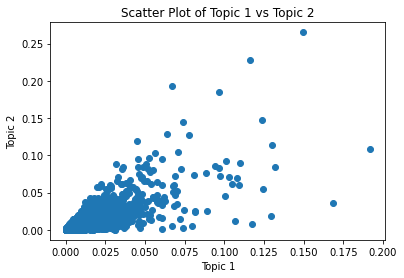

In [27]:
fig, ax = plt.subplots()

ax.scatter(encoding_matrix["topic_1"], encoding_matrix["topic_2"])

ax.set_xlabel('Topic 1')
ax.set_ylabel('Topic 2')
ax.set_title('Scatter Plot of Topic 1 vs Topic 2')

plt.show()

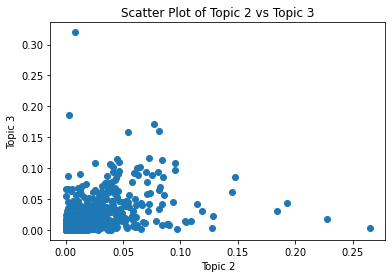

In [28]:
fig, ax = plt.subplots()

ax.scatter(encoding_matrix["topic_2"], encoding_matrix["topic_3"])

ax.set_xlabel('Topic 2')
ax.set_ylabel('Topic 3')
ax.set_title('Scatter Plot of Topic 2 vs Topic 3')

plt.show()

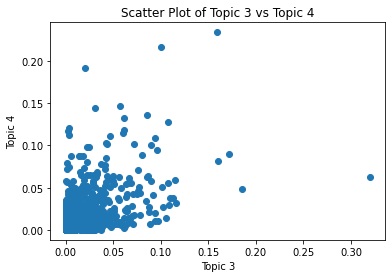

In [29]:
fig, ax = plt.subplots()

ax.scatter(encoding_matrix["topic_3"], encoding_matrix["topic_4"])

ax.set_xlabel('Topic 3')
ax.set_ylabel('Topic 4')
ax.set_title('Scatter Plot of Topic 3 vs Topic 4')

plt.show()

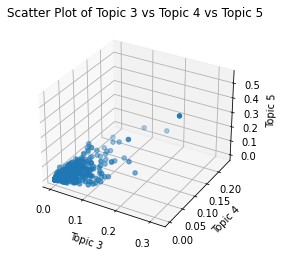

In [30]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(encoding_matrix["topic_3"].values, encoding_matrix["topic_4"].values, encoding_matrix["topic_5"].values)

ax.set_xlabel('Topic 3')
ax.set_ylabel('Topic 4')
ax.set_zlabel('Topic 5')
ax.set_title('Scatter Plot of Topic 3 vs Topic 4 vs Topic 5')

plt.show()

In [31]:
svd = TruncatedSVD(n_components=10)
kmeans = KMeans(n_clusters=10)
pipeline = make_pipeline(svd, kmeans)
pipeline.fit(features)
labels = pipeline.predict(features)

C:\Users\raphaella220046\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
df = pd.DataFrame({'labels': labels, 'docs': titles, 'abstract': corpus})
print(df.sort_values('labels'))

      labels                                               docs  \
3582       0  Magnesium doped TiO2 as an efficient electron ...   
4381       0  Ball Milling synthesis and characterization of...   
712        0  Efficient Perovskite Photovoltaic-Thermoelectr...   
2596       0  Halide perovskite materials as light harvester...   
716        0  Facile Formation of 2D-3D Heterojunctions on P...   
...      ...                                                ...   
3768       9  Compliance Current-Dependent Dual-Functional B...   
1673       9  A quantum-mechanical investigation of oxygen v...   
1676       9  First principle study of electron and band str...   
1621       9  Phase-Selective Solution Synthesis of Perovski...   
3866       9  Thermoelectric property of (Ca,M)TiO3 by ab in...   

                                               abstract  
3582  Perovskite solar cells (PSCs) are rapidly emer...  
4381  In this work, Ball Milling is investigated as ...  
712   An efficient pe

In [33]:
df.to_excel('topics.xlsx')

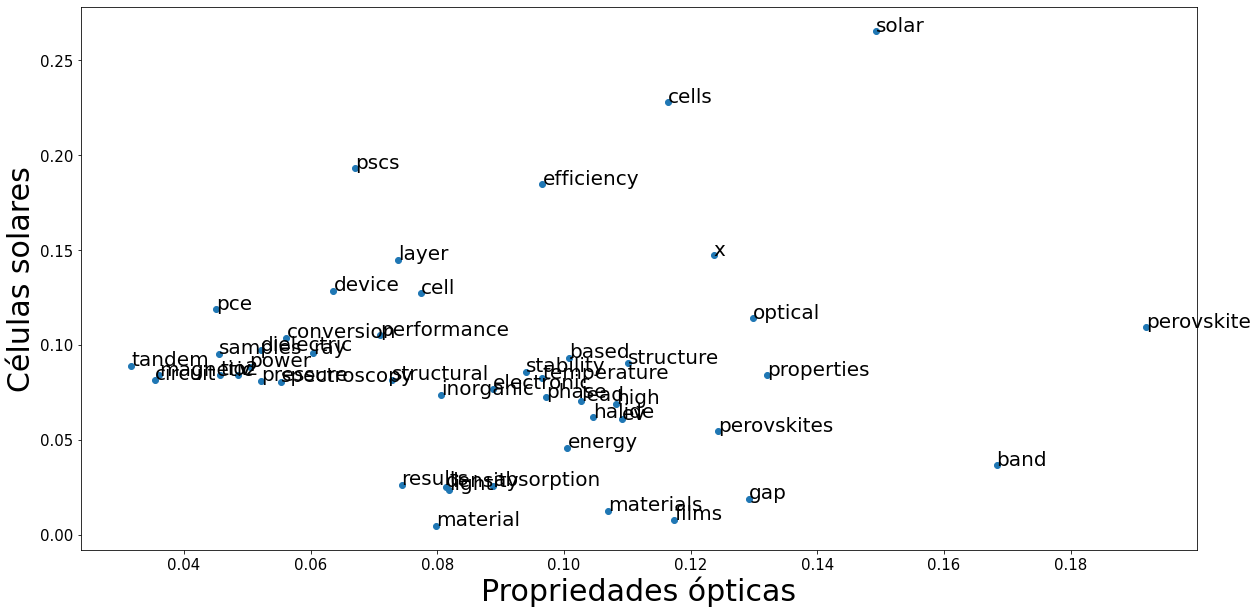

In [34]:
# Filtering the top 30 values for topic 3 and topic 4
top30_topic3 = encoding_matrix.nlargest(30, 'topic_1')
top30_topic4 = encoding_matrix.nlargest(30, 'topic_2')
top30_combined = pd.concat([top30_topic3, top30_topic4]).drop_duplicates()
# Creating the plot
fig, ax = plt.subplots(figsize=(20, 10))
# Scatter plot
ax.scatter(top30_combined["topic_1"], top30_combined["topic_2"])
# Annotating each point
for i, word in enumerate(top30_combined.index):
    ax.annotate(word, (top30_combined["topic_1"][i], top30_combined["topic_2"][i]), size=20)
# Setting labels and title
ax.set_xlabel('Propriedades ópticas', size=30)
ax.set_ylabel('Células solares', size=30)
plt.tick_params(labelsize=15)
# Show plot
plt.savefig('top1_2', dpi=300)
plt.show()

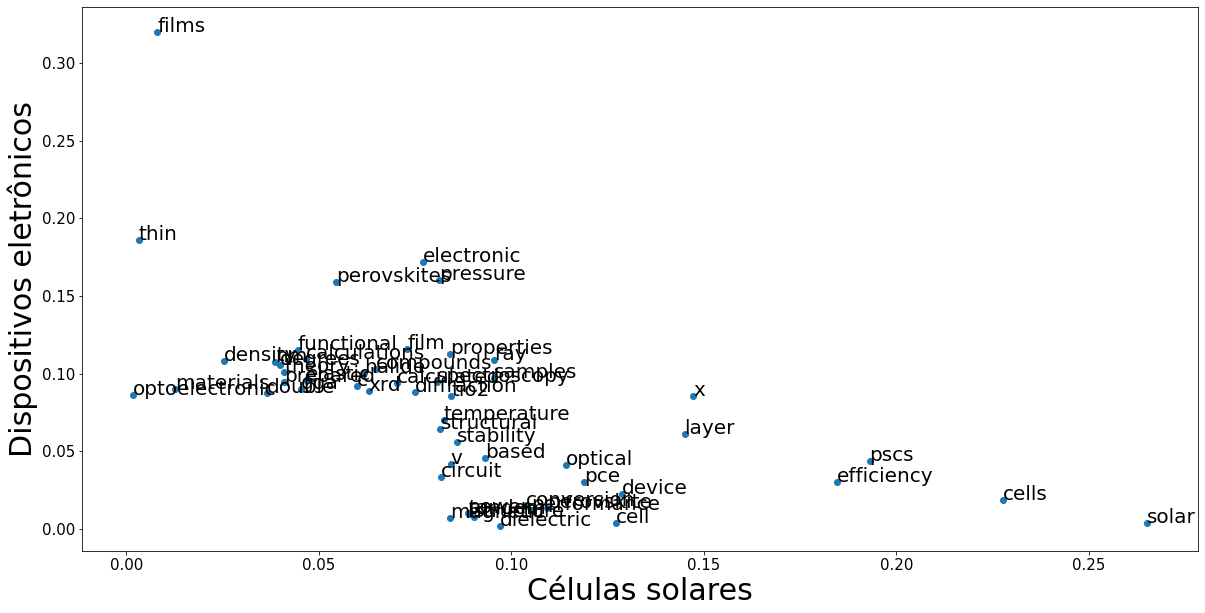

In [35]:
# Filtering the top 30 values for topic 3 and topic 4
top30_topic3 = encoding_matrix.nlargest(30, 'topic_2')
top30_topic4 = encoding_matrix.nlargest(30, 'topic_3')
top30_combined = pd.concat([top30_topic3, top30_topic4]).drop_duplicates()
# Creating the plot
fig, ax = plt.subplots(figsize=(20, 10))
# Scatter plot
ax.scatter(top30_combined["topic_2"], top30_combined["topic_3"])
# Annotating each point
for i, word in enumerate(top30_combined.index):
    ax.annotate(word, (top30_combined["topic_2"][i], top30_combined["topic_3"][i]), size=20)
# Setting labels and title
ax.set_xlabel('Células solares', size=30)
ax.set_ylabel('Dispositivos eletrônicos', size=30)
plt.tick_params(labelsize=15)
# Show plot
plt.savefig('top2_3', dpi=300)
plt.show()

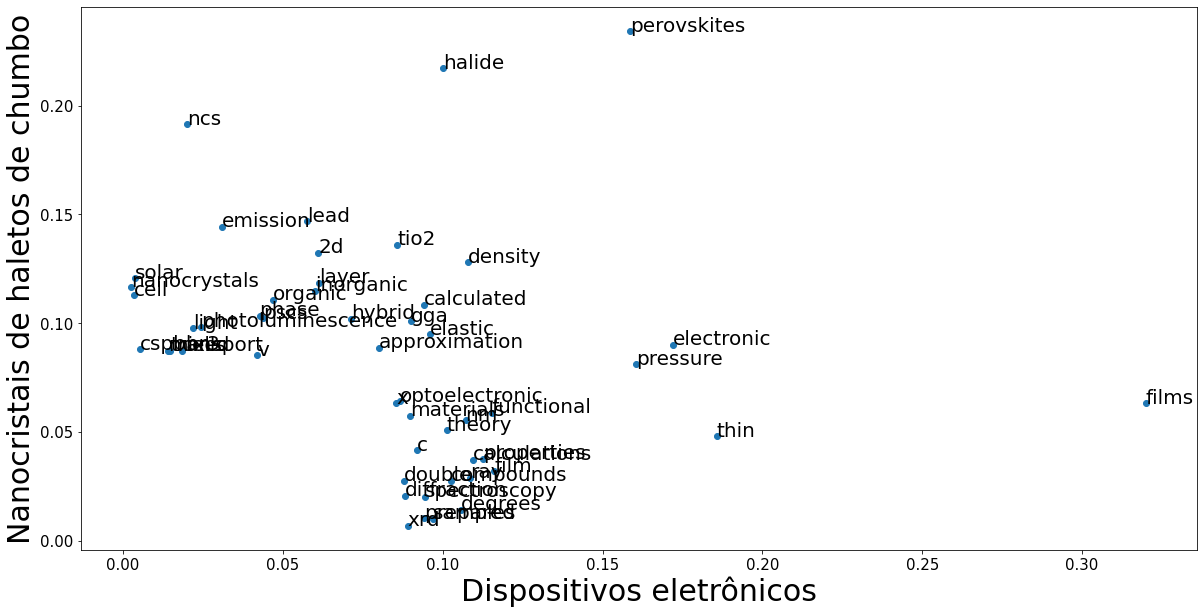

In [36]:
# Filtering the top 30 values for topic 3 and topic 4
top30_topic3 = encoding_matrix.nlargest(30, 'topic_3')
top30_topic4 = encoding_matrix.nlargest(30, 'topic_4')
top30_combined = pd.concat([top30_topic3, top30_topic4]).drop_duplicates()
# Creating the plot
fig, ax = plt.subplots(figsize=(20, 10))
# Scatter plot
ax.scatter(top30_combined["topic_3"], top30_combined["topic_4"])
# Annotating each point
for i, word in enumerate(top30_combined.index):
    ax.annotate(word, (top30_combined["topic_3"][i], top30_combined["topic_4"][i]), size=20)
# Setting labels and title
ax.set_xlabel('Dispositivos eletrônicos', size=30)
ax.set_ylabel('Nanocristais de haletos de chumbo', size=30)
plt.tick_params(labelsize=15)
# Show plot
plt.savefig('top3_4', dpi=300)
plt.show()

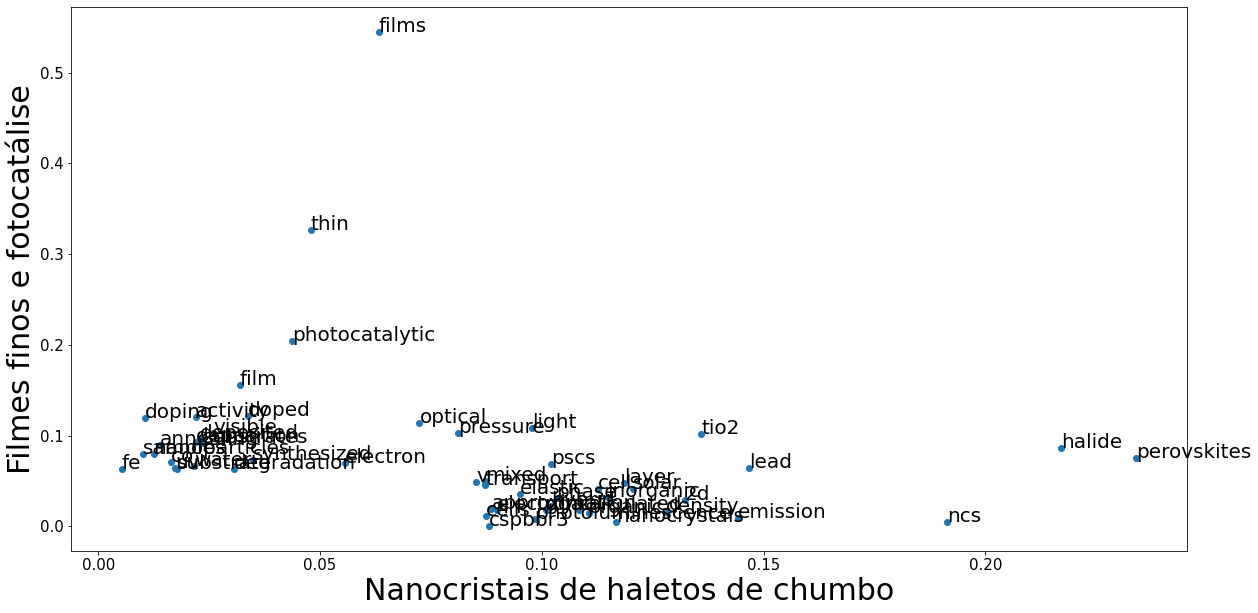

In [37]:
# Filtering the top 30 values for topic 3 and topic 4
top30_topic3 = encoding_matrix.nlargest(30, 'topic_4')
top30_topic4 = encoding_matrix.nlargest(30, 'topic_5')
top30_combined = pd.concat([top30_topic3, top30_topic4]).drop_duplicates()
# Creating the plot
fig, ax = plt.subplots(figsize=(20, 10))
# Scatter plot
ax.scatter(top30_combined["topic_4"], top30_combined["topic_5"])
# Annotating each point
for i, word in enumerate(top30_combined.index):
    ax.annotate(word, (top30_combined["topic_4"][i], top30_combined["topic_5"][i]), size=20)
# Setting labels and title
ax.set_xlabel('Nanocristais de haletos de chumbo', size=30)
ax.set_ylabel('Filmes finos e fotocatálise', size=30)
plt.tick_params(labelsize=15)
# Show plot
plt.savefig('top4_5', dpi=300)
plt.show()

# Grafo

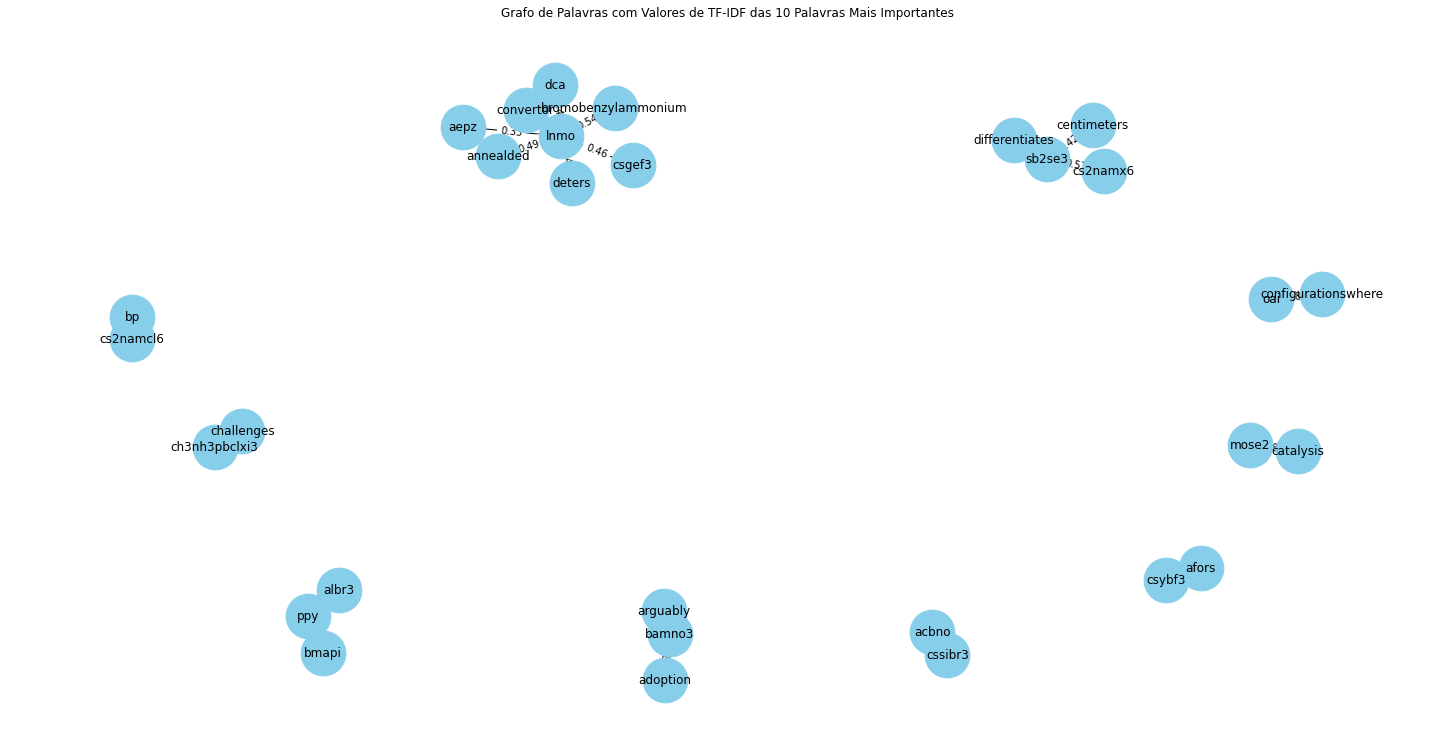

In [38]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

top_indices = np.argsort(features.max(axis=0).toarray()[0])[-10:]

# Criar um grafo
G = nx.Graph()

# Adicionar nós ao grafo
for i in top_indices:
    G.add_node(words[i])

# Adicionar arestas ponderadas com base nos valores de TF-IDF
for i, j in zip(*features.nonzero()):
    if i and j in top_indices and i != j:  # Evitar loops e arestas entre o mesmo nó
        weight = features[i, j].item() # Obter o valor TF-IDF como um número, não como um array
        G.add_edge(words[i], words[j], weight=round(weight,2))
        
# Visualizar o grafo
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G)  # Layout para visualização
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Grafo de Palavras com Valores de TF-IDF das 10 Palavras Mais Importantes')
plt.show()

# Consulta de dados

In [39]:
# Transforma o termo buscado "query" em um vetor TF-IDF.

query = ["band gap"]
query_tfidf = vectorizer.transform(query)

In [40]:
# Calcula a similaridade pelo cosseno entre os vetores de cada documento
# O método flatten() retorna apenas uma lista, ao invés de uma lista de listas

cosine_similarities = cosine_similarity(features, query_tfidf).flatten()

In [41]:
# O método argsort() retorna uma lista de índices em ordem crescente
# A função retorna o último índice da lista

def top_k(arr, k):
    kth_largest = (k + 1) * -1
    return np.argsort(arr)[:kth_largest:-1]

In [42]:
#Apresenta as 5 primeiros sentenças da lista

top_related_indices = top_k(cosine_similarities, 5)
print(top_related_indices)

[183 913  45   0 230]


In [43]:
# Similaridade

print(cosine_similarities[top_related_indices])

[0.25669254 0.24547462 0.22312747 0.20453139 0.20365474]


In [44]:
# Melhor correspondência

print(df_perovskite.Abstract[top_related_indices[0]])
print()
print(df_perovskite.Abstract[top_related_indices[1]])

Environmentally friendly halide double perovskites with improved stability are regarded as a promising alternative to lead halide perovskites. The benchmark double perovskite, Cs2AgBiBr6, shows attractive optical and electronic features, making it promising for high-efficiency optoelectronic devices. However, the large band gap limits its further applications, especially for photovoltaics. Herein, we develop a novel crystal-engineering strategy to significantly decrease the band gap by approximately 0.26 eV, reaching the smallest reported band gap of 1.72 eV for Cs(2)AgBiBr(6)under ambient conditions. The band-gap narrowing is confirmed by both absorption and photoluminescence measurements. Our first-principles calculations indicate that enhanced Ag-Bi disorder has a large impact on the band structure and decreases the band gap, providing a possible explanation of the observed band-gap narrowing effect. This work provides new insights for achieving lead-free double perovskites with sui